# Analysis
Observable trend #1: The higher the cities latitude, the colder the average temperaure will be. 
Observable trend #2: Based on the 4 plots below, it can be said that latitude has a direct effect on temperature but not a direct effect on humidity, cloudiness, or wind speed. These 3 attributes (humidity, cloudiness and wind speed have a larger effect on temperature than anything else. 
Observable trend #3: Higher latitudes are more likely to have higher humidity, but there isn't a very high correlation. 

In [1]:
# import dependencies
import random # random to generate random latitude and longitudes
import pandas as pd # pandas library
import time 
import seaborn as sns # seaborn library to set the aesthetics for the graphs
import matplotlib.pyplot as plt # for creating/plotting graphs
import numpy as np
from datetime import datetime
import openweathermapy as owm

# Generate Cities List


In [2]:
# citypy library - to Look up for city names with geo-coordinates
from citipy import citipy 
cities = []

while len(cities)<600:
    x = (random.choice(range(-90,90))) # randomly generate numbers in range -90 & 90 for latitude
    y = (random.choice(range(-180,180))) # randomly generate numbers in range -180 & 180 for longitude
    city = citipy.nearest_city(x,y).city_name # look up city to match the lat & long randomly generated
    if city not in cities:
        cities.append(city)

In [3]:
len(cities)

600

# API Calls

In [4]:
from config import api_key

settings = {"units": "imperial", "appid": api_key}

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [5]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") 
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | san juan
http://api.openweathermap.org/data/2.5/weather?q=san%20juan&units=imperial&APPID=73102b7315990b784a421e8db816a51b


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Ple

Processing Record 2 of Set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 3 of Set 0 | marcona
http://api.openweathermap.org/data/2.5/weather?q=marcona&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 4 of Set 0 | burkhala
http://api.openweathermap.org/data/2.5/weather?q=burkhala&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 5 of Set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 6 of Set 0 | paamiut
http://api.openweathermap.org/data/2.5/weather?q=paamiut&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 7 of Set 0 | yekaterinoslavka
http://api.openweathermap.org/data/2.5/weather?q=yekaterinoslavka&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 8 of S

HTTP Error 404: Not Found
Processing Record 6 of Set 1 | brewster
http://api.openweathermap.org/data/2.5/weather?q=brewster&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 7 of Set 1 | soe
http://api.openweathermap.org/data/2.5/weather?q=soe&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 8 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial%20do%20cabo&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 9 of Set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 10 of Set 1 | east london
http://api.openweathermap.org/data/2.5/weather?q=east%20london&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 11 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?q=dikson&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Proces

Processing Record 8 of Set 2 | scarborough
http://api.openweathermap.org/data/2.5/weather?q=scarborough&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 9 of Set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 10 of Set 2 | astoria
http://api.openweathermap.org/data/2.5/weather?q=astoria&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 11 of Set 2 | haibowan
http://api.openweathermap.org/data/2.5/weather?q=haibowan&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 12 of Set 2 | sisimiut
http://api.openweathermap.org/data/2.5/weather?q=sisimiut&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 13 of Set 2 | avarua
http://api.openweathermap.org/data/2.5/weather?q=avarua&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 14 of Set 2 | airai
http://api.openweatherma

Processing Record 12 of Set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 13 of Set 3 | coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 14 of Set 3 | woodward
http://api.openweathermap.org/data/2.5/weather?q=woodward&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 15 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 16 of Set 3 | hilo
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 17 of Set 3 | kangaba
http://api.openweathermap.org/data/2.5/weather?q=kangaba&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 18 of Set 3 | taganak
http://api.openweathermap.org/data/2.5/weather

HTTP Error 404: Not Found
Processing Record 15 of Set 4 | sorland
http://api.openweathermap.org/data/2.5/weather?q=sorland&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 16 of Set 4 | tobolsk
http://api.openweathermap.org/data/2.5/weather?q=tobolsk&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 17 of Set 4 | sitka
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 18 of Set 4 | kalmunai
http://api.openweathermap.org/data/2.5/weather?q=kalmunai&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 19 of Set 4 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 20 of Set 4 | magnolia
http://api.openweathermap.org/data/2.5/weather?q=magnolia&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 21 of Set 4 | marzuq
http://api.openweathermap.org/dat

Processing Record 18 of Set 5 | fairbanks
http://api.openweathermap.org/data/2.5/weather?q=fairbanks&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 19 of Set 5 | jinchang
http://api.openweathermap.org/data/2.5/weather?q=jinchang&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 20 of Set 5 | lawrenceville
http://api.openweathermap.org/data/2.5/weather?q=lawrenceville&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 21 of Set 5 | tura
http://api.openweathermap.org/data/2.5/weather?q=tura&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 22 of Set 5 | itaituba
http://api.openweathermap.org/data/2.5/weather?q=itaituba&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 23 of Set 5 | flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 24 of Set 5 | sur
http://api.openweathermap.org/data/2.5/wea

Processing Record 21 of Set 6 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?q=derzhavinsk&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 22 of Set 6 | mehamn
http://api.openweathermap.org/data/2.5/weather?q=mehamn&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 23 of Set 6 | katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 24 of Set 6 | nyagan
http://api.openweathermap.org/data/2.5/weather?q=nyagan&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 25 of Set 6 | kamaishi
http://api.openweathermap.org/data/2.5/weather?q=kamaishi&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 26 of Set 6 | manaus
http://api.openweathermap.org/data/2.5/weather?q=manaus&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 27 of Set 6 | lata
http://api.openweathermap.org/data/2.5/weather?q=la

Processing Record 25 of Set 7 | minsk
http://api.openweathermap.org/data/2.5/weather?q=minsk&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 26 of Set 7 | beloha
http://api.openweathermap.org/data/2.5/weather?q=beloha&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 27 of Set 7 | ayagoz
http://api.openweathermap.org/data/2.5/weather?q=ayagoz&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 28 of Set 7 | benoy
http://api.openweathermap.org/data/2.5/weather?q=benoy&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 29 of Set 7 | bayanday
http://api.openweathermap.org/data/2.5/weather?q=bayanday&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 30 of Set 7 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?q=bolungarvik&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 31 of Set 7 | cayenne
http://api.openweathermap.org/

Processing Record 29 of Set 8 | abrau-dyurso
http://api.openweathermap.org/data/2.5/weather?q=abrau-dyurso&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 30 of Set 8 | nyurba
http://api.openweathermap.org/data/2.5/weather?q=nyurba&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 31 of Set 8 | bur gabo
http://api.openweathermap.org/data/2.5/weather?q=bur%20gabo&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 32 of Set 8 | lensk
http://api.openweathermap.org/data/2.5/weather?q=lensk&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 33 of Set 8 | gat
http://api.openweathermap.org/data/2.5/weather?q=gat&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 34 of Set 8 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?q=sao%20felix%20do%20xingu&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 35 of Set 8 | velyka m

Processing Record 32 of Set 9 | pokaran
http://api.openweathermap.org/data/2.5/weather?q=pokaran&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 33 of Set 9 | gizo
http://api.openweathermap.org/data/2.5/weather?q=gizo&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 34 of Set 9 | brownwood
http://api.openweathermap.org/data/2.5/weather?q=brownwood&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 35 of Set 9 | karamken
http://api.openweathermap.org/data/2.5/weather?q=karamken&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 36 of Set 9 | suratgarh
http://api.openweathermap.org/data/2.5/weather?q=suratgarh&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 37 of Set 9 | constitucion
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 38 of Set 9 | suceveni
http://api.op

Processing Record 35 of Set 10 | tual
http://api.openweathermap.org/data/2.5/weather?q=tual&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 36 of Set 10 | asyut
http://api.openweathermap.org/data/2.5/weather?q=asyut&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 37 of Set 10 | sumenep
http://api.openweathermap.org/data/2.5/weather?q=sumenep&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 38 of Set 10 | datong
http://api.openweathermap.org/data/2.5/weather?q=datong&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 39 of Set 10 | lolua
http://api.openweathermap.org/data/2.5/weather?q=lolua&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 40 of Set 10 | hunza
http://api.openweathermap.org/data/2.5/weather?q=hunza&units=imperial&APPID=73102b7315990b784a421e8db816a51b
HTTP Error 404: Not Found
Processing Record 41 of Set 10 | umm lajj
http://api.ope

Processing Record 37 of Set 11 | caboolture
http://api.openweathermap.org/data/2.5/weather?q=caboolture&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 38 of Set 11 | kuching
http://api.openweathermap.org/data/2.5/weather?q=kuching&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 39 of Set 11 | amapa
http://api.openweathermap.org/data/2.5/weather?q=amapa&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 40 of Set 11 | keetmanshoop
http://api.openweathermap.org/data/2.5/weather?q=keetmanshoop&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 41 of Set 11 | naron
http://api.openweathermap.org/data/2.5/weather?q=naron&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 42 of Set 11 | benguela
http://api.openweathermap.org/data/2.5/weather?q=benguela&units=imperial&APPID=73102b7315990b784a421e8db816a51b
Processing Record 43 of Set 11 | comodoro rivadavia
http://api.openweathermap.

In [6]:
# Display the count of cities with weather data
WeatherPy_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Max Temp      531
Wind Speed    531
Lat           531
Lng           531
Humidity      531
dtype: int64

In [17]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,San Juan,20,PH,1552233226,80.6,3.22,14.6,121.03,65
1,Busselton,0,AU,1552232816,62.01,17.2,-33.64,115.35,54
2,Rikitea,64,PF,1552232861,75.68,9.82,-23.12,-134.97,100
3,Paamiut,12,GL,1552232989,27.22,26.08,61.99,-49.67,100
4,Yekaterinoslavka,92,RU,1552233381,21.86,11.1,54.34,72.46,80
5,Castro,0,CL,1552230000,71.6,3.36,-42.48,-73.76,53
6,Grindavik,0,IS,1552231800,35.6,5.82,63.84,-22.43,64
7,Hithadhoo,0,MV,1552232931,84.05,3.22,-0.6,73.08,100
8,Albany,90,US,1552232851,37,8.05,42.65,-73.75,80
9,Te Anau,48,NZ,1552233265,44.95,2.33,-45.41,167.72,90


# Latitude vs Temperature Plot

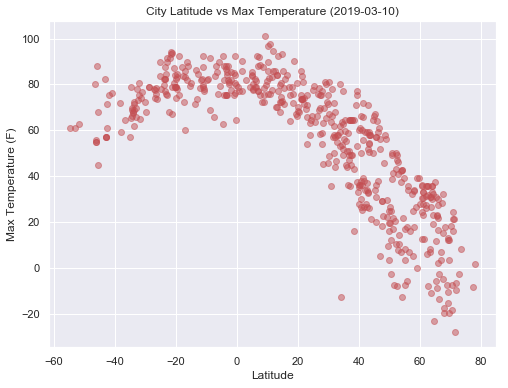

In [15]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

# Latitude vs Humidity Plot

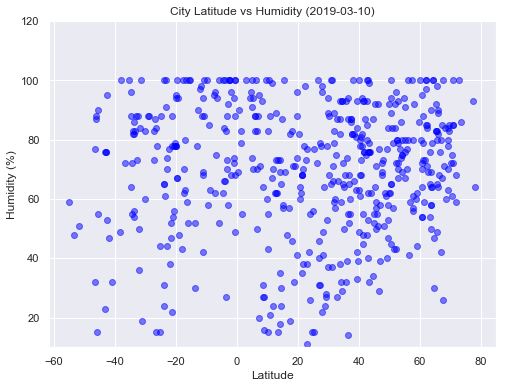

In [16]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

# Latitude vs Cloudiness

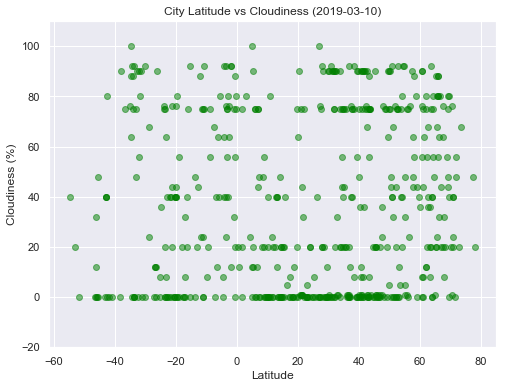

In [18]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

# Latitude vs Wind Speed

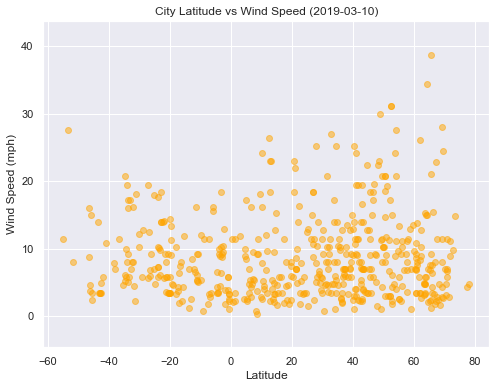

In [19]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='orange', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()